In [1]:
#installing basic ML libraries
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scikit-learn

In [2]:
#importing ML libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [39]:
import pandas as pd

# Import CSV file
df = pd.read_csv("raindataset.csv")

# Replace 'T' and '-' with 0.0
#df = df.replace('T', 0.0)
#df = df.replace('-', 0.0)

# Convert columns to float
'''df['Rain_inc'] = pd.to_numeric(df['Rain_inc'], errors='coerce')
df['Temp_f'] = pd.to_numeric(df['Temp_f'], errors='coerce')
df['Humd_%'] = pd.to_numeric(df['Humd_%'], errors='coerce')
df['Wind_mph'] = pd.to_numeric(df['Wind_mph'], errors='coerce')
df['Visiblity_m'] = pd.to_numeric(df['Visiblity_m'], errors='coerce')
'''

# Save the cleaned DataFrame back to the CSV file
df.to_csv('raindataset.csv', index=False)

# Display the first few rows of the DataFrame
df.head()


,Temp_f,Humd_%,Wind_mph,Visiblity_m,Rain_inc
0,60,75,4,7,0.46
1,48,68,6,10,0.00
2,45,52,3,10,0.00
3,46,56,4,10,0.00
4,50,71,2,10,0.00


In [40]:
cdf = df[['Temp_f','Humd_%','Wind_mph','Visiblity_m','Rain_inc']]
cdf.head(9)

,Temp_f,Humd_%,Wind_mph,Visiblity_m,Rain_inc
0,60,75,4,7,0.46
1,48,68,6,10,0.00
2,45,52,3,10,0.00
3,46,56,4,10,0.00
4,50,71,2,10,0.00
5,48,63,3,9,0.00
6,53,65,1,9,0.00
7,51,64,2,10,0.00
8,50,76,5,10,0.00


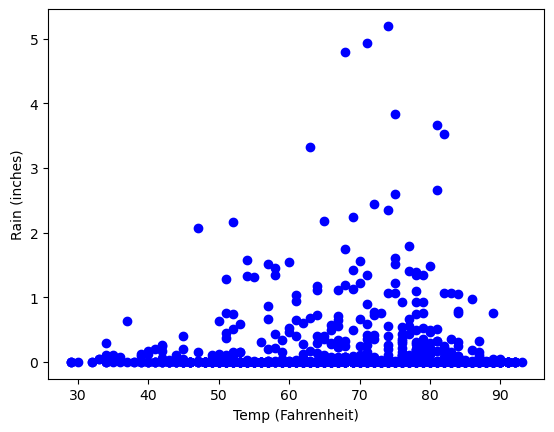

In [19]:
import matplotlib.pyplot as plt

plt.scatter(df['Temp_f'], df['Rain_inc'], color='blue')
plt.xlabel("Temp (Fahrenheit)")
plt.ylabel("Rain (inches)")

# Adjust y-axis ticks for better readability
plt.yticks(range(0, int(df['Rain_inc'].max()) + 1))

# Show the plot
plt.show()


In [20]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

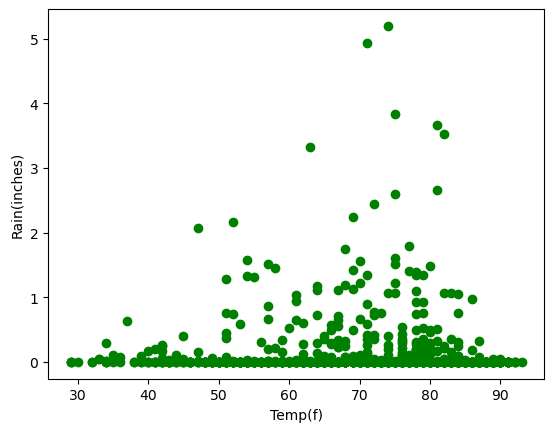

In [21]:
plt.scatter(train.Temp_f, train.Rain_inc,  color='Green')
plt.xlabel("Temp(f)")
plt.ylabel("Rain(inches)")
plt.show()

In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Temp_f','Humd_%','Wind_mph','Visiblity_m']])
y = np.asanyarray(train[['Rain_inc']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 0.00080654  0.00685093  0.00587542 -0.07938499]]


In [68]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)
regr.fit(x_poly, y)

y_hat_poly = regr.predict(poly.transform(x))
print("Mean Squared error (MSE): %.2f" % np.mean((y_hat_poly - y) ** 2))
print('Variance score: %.2f' % regr.score(poly.transform(x), y))


Mean Squared error (MSE): 0.12
Variance score: 0.39


In [73]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Temp_f', 'Humd_%', 'Wind_mph', 'Visiblity_m']])
y = np.asanyarray(train[['Rain_inc']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_hat= regr.predict(test[['Temp_f', 'Humd_%', 'Wind_mph', 'Visiblity_m']])
x = np.asanyarray(test[['Temp_f', 'Humd_%', 'Wind_mph', 'Visiblity_m']])
y = np.asanyarray(test[['Rain_inc']])
print("Residual sum of squares: %.2f"% np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[ 0.00080654  0.00685093  0.00587542 -0.07938499]]
Residual sum of squares: 0.14
Variance score: 0.12


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [74]:
# Assuming 'regr' is your trained linear regression model

# New input values for prediction
new_inputs = np.array([[25.0, 85.0, 50.0, 1.0]])  # Replace with your actual values

# Make predictions
predicted_rainfall = regr.predict(new_inputs)

print("Predicted Rainfall: %.2f inches" % predicted_rainfall)


Predicted Rainfall: 1.12 inches
